In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [28]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

#Daten lesen OeV
gpdOev = gpd.read_file("../Data/Reisezeit_OeV_2011.shp")

#Daten lesen MiV
gpdMiv = gpd.read_file("../Data/Reisezeit_MIV_2011.shp")

In [13]:
#Was sind die Zentren
zentren = gpdMiv[gpdMiv['REISEZEIT']==0].style.hide_columns(['GEM_NO','PLZ','REISEZEIT','STAND','geometry','point'])
zentren

/Users/christian/opt/anaconda3/envs/geo_env/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,NAME,KT_KZ
170,Zürich,ZH
208,Bern,BE
1154,Basel,BS
2063,Lugano,TI
2293,Lausanne,VD
2788,Genève,GE


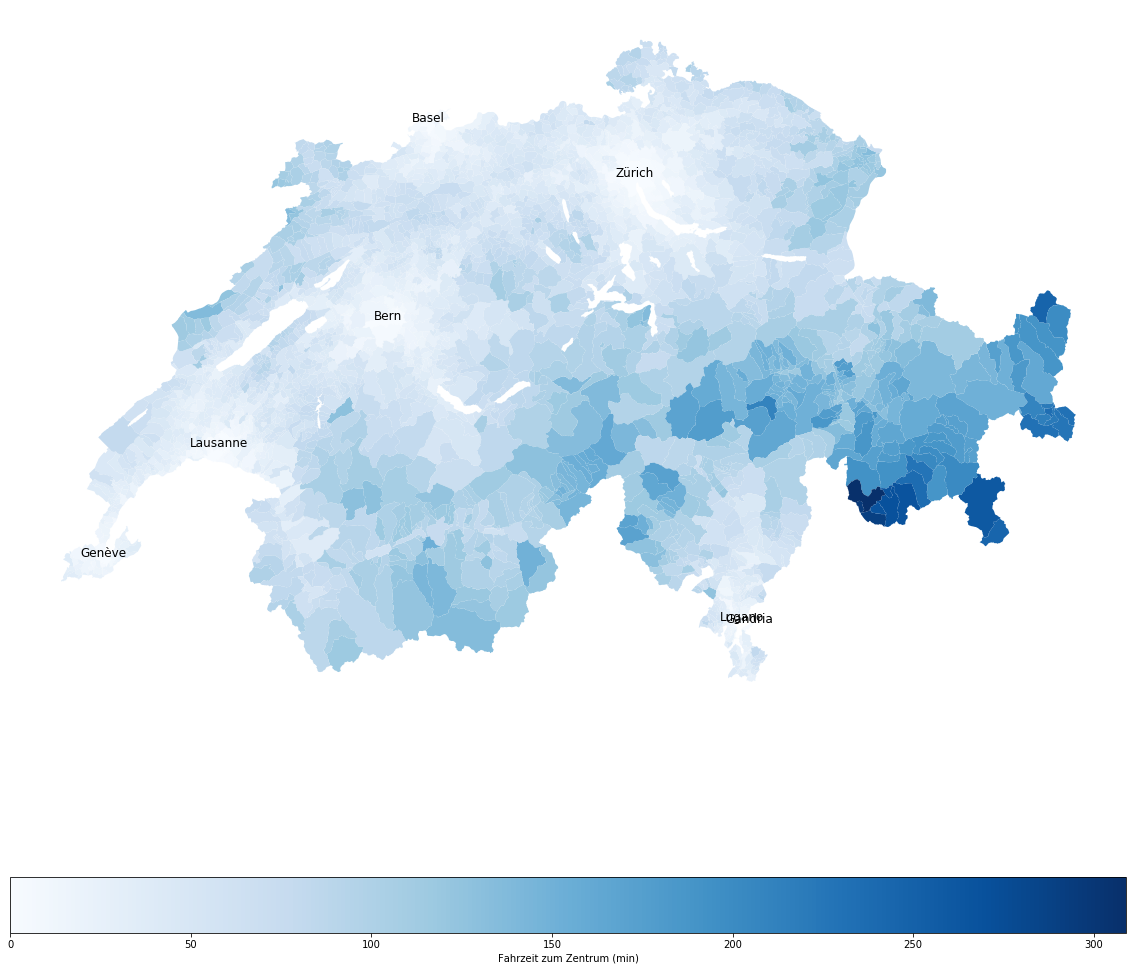

In [18]:
#Reisezeit zu den Zentren mit ÖV
#andere colormaps: gist_heatr 'https://gallantlab.github.io/colormaps.html'
ax = gpdOev.plot(figsize=(20,20), 
                 column='REISEZEIT', 
                 cmap = 'Blues', 
                 legend=True, 
                 legend_kwds={'label': "Fahrzeit zum Zentrum (min)", 'orientation': "horizontal"})
#Zentren labeln
gpdOev[gpdOev['REISEZEIT']==0].apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', color = 'black', fontsize='large'),axis=1);
plt.box(False)
plt.axis('off')
plt.savefig('../Grafiken/reisezeitZuDenZentrenMitOev.pdf')

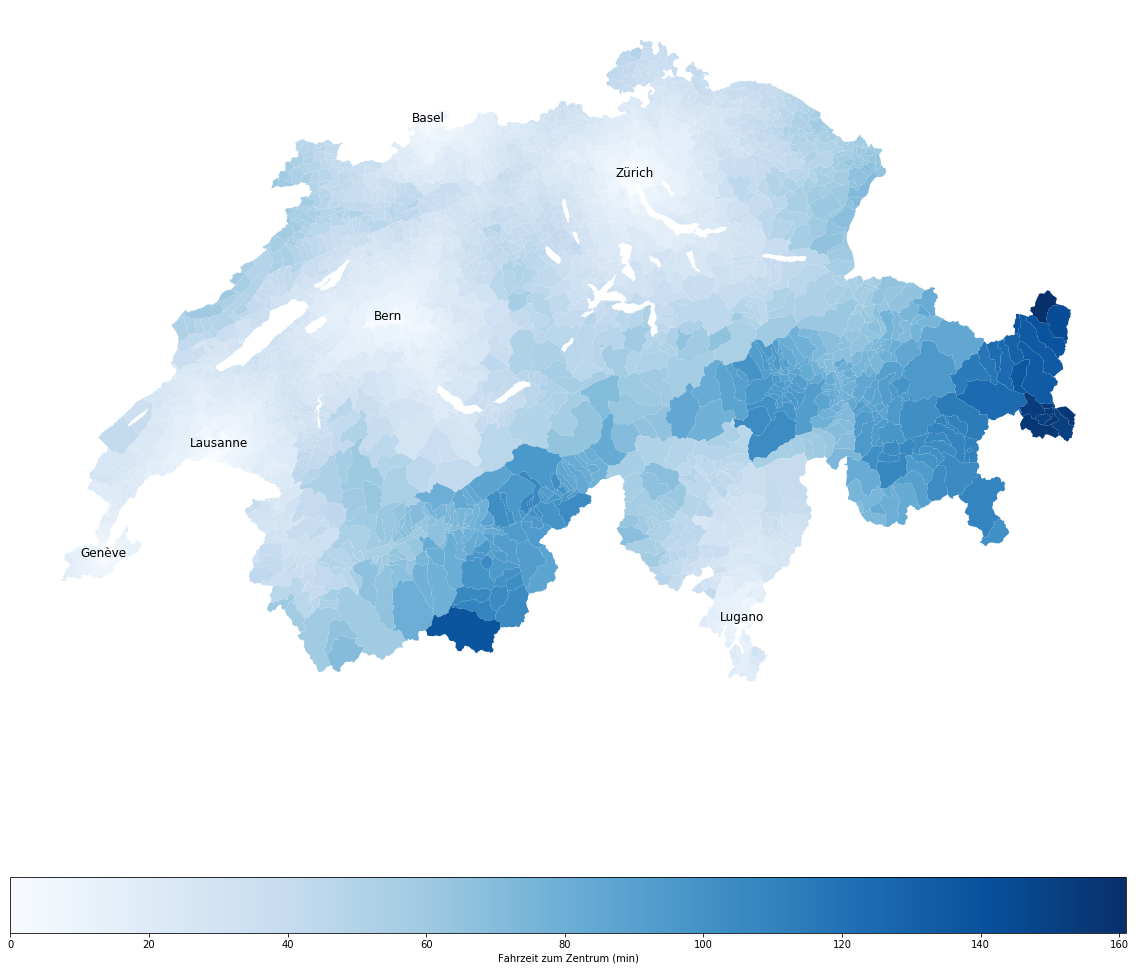

In [21]:
#Reisezeit zu den Zentren mit MiV
ax = gpdMiv.plot(figsize=(20,20), 
                 column='REISEZEIT', 
                 cmap = 'Blues', 
                 legend=True, 
                 legend_kwds={'label': "Fahrzeit zum Zentrum (min)", 'orientation': "horizontal"})
#Zentren labeln
gpdMiv[gpdMiv['REISEZEIT']==0].apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', color = 'black', fontsize='large'),axis=1);
plt.box(False)
plt.axis('off')
plt.savefig('../Grafiken/reisezeitZuDenZentrenMitMiv.pdf')

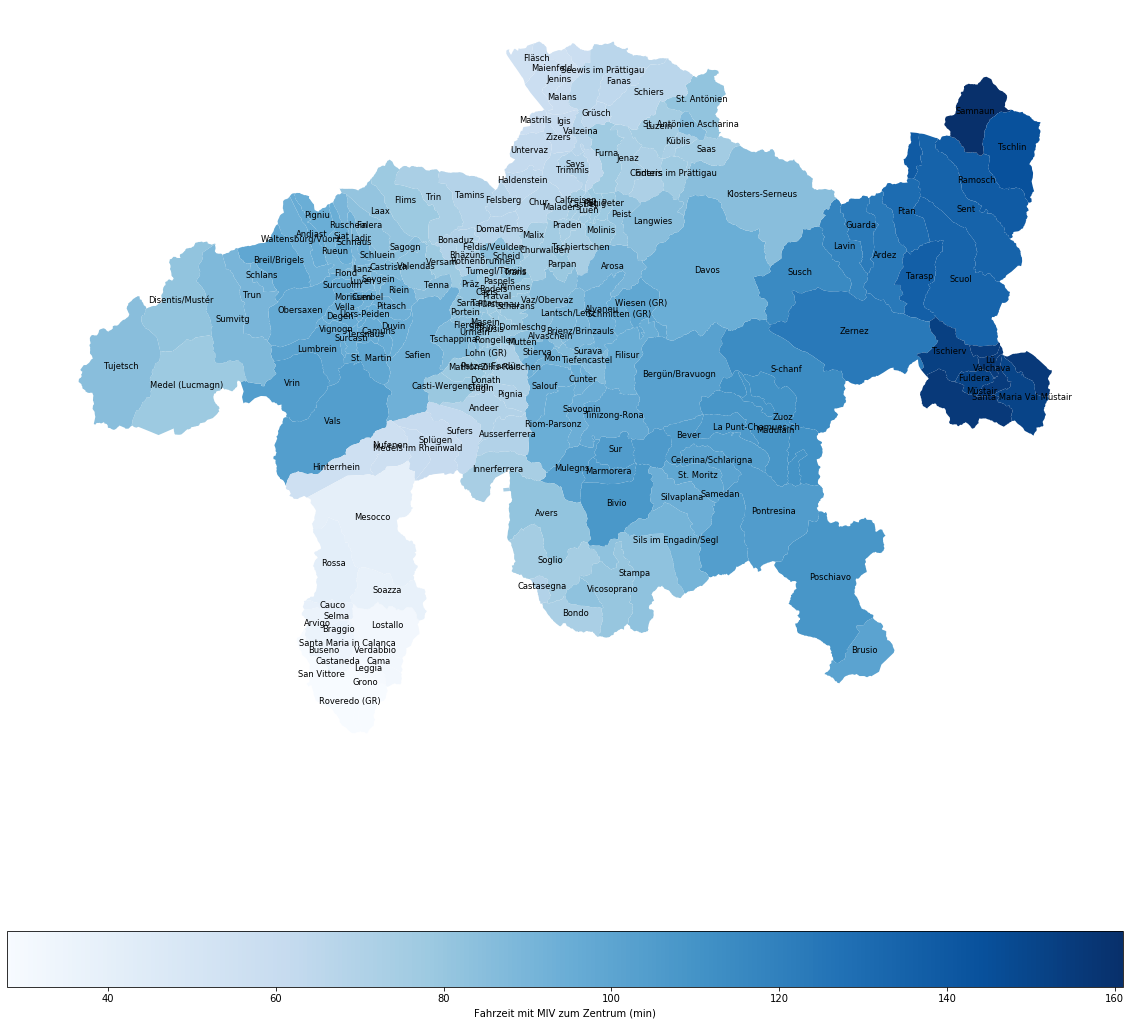

In [25]:
#Kantone rausfiltern zb. Kanton Graubünden
gpdGr = gpdMiv[gpdMiv['KT_KZ'].str.match('GR')]
ax = gpdGr.plot(column='REISEZEIT', 
                cmap = 'Blues',
               figsize=(20,20),
               legend=True, 
                 legend_kwds={'label': "Fahrzeit mit MIV zum Zentrum (min)", 'orientation': "horizontal"})

gpdGr.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', color = 'black', fontsize='small'),axis=1);

#Box deaktivieren
plt.box(False)

#Achsenbeschriftungen deaktivieren
plt.axis('off')

plt.savefig('../Grafiken/reisezeitZuDenZentrenMitMivGraubünden.pdf')

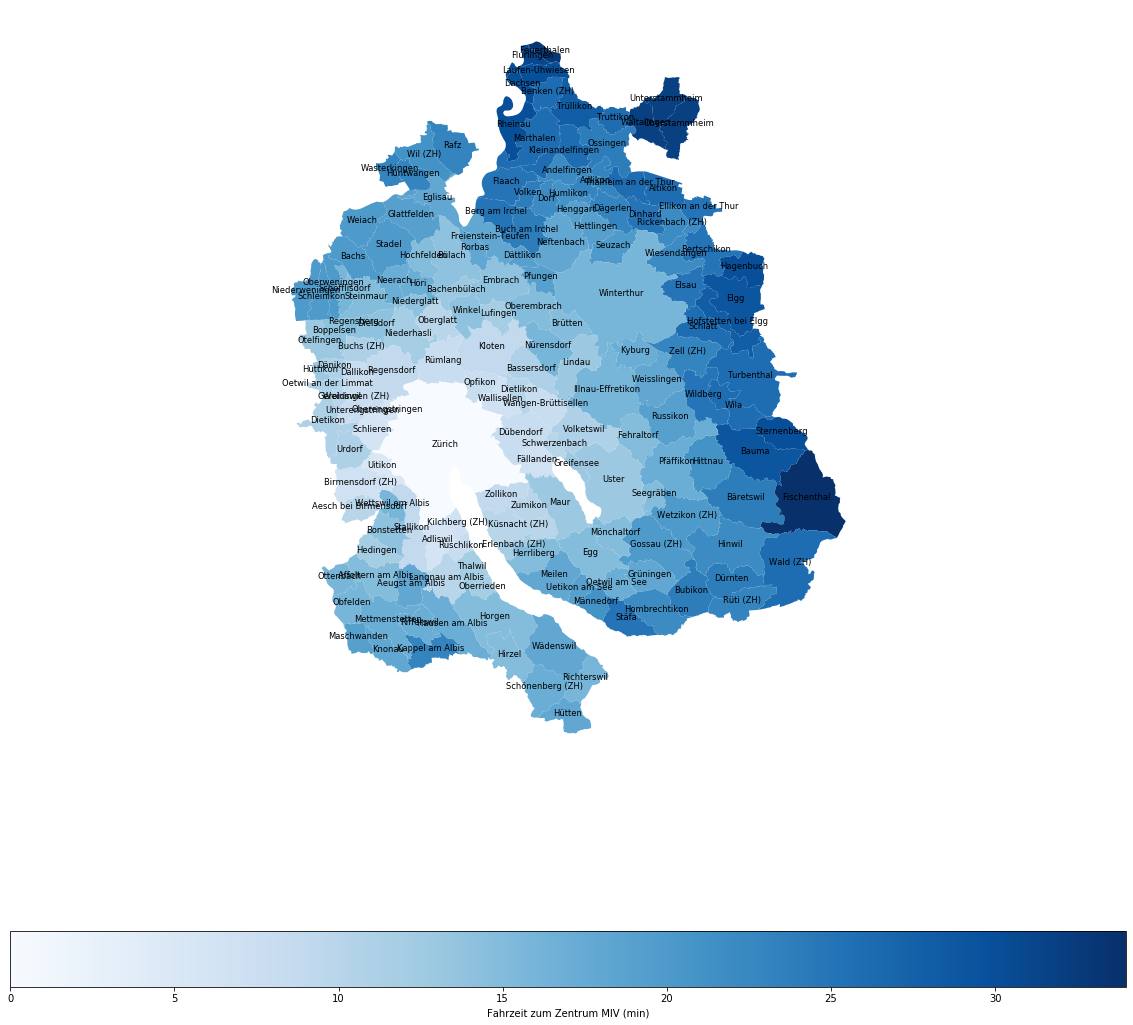

In [26]:
#Kantone rausfiltern zb. Kanton Zürich
gpdGr = gpdMiv[gpdMiv['KT_KZ'].str.match('ZH')]
ax = gpdGr.plot(column='REISEZEIT', 
                cmap = 'Blues',
               figsize=(20,20),
               legend=True, 
                 legend_kwds={'label': "Fahrzeit zum Zentrum MIV (min)", 'orientation': "horizontal"})

gpdGr.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', color = 'black', fontsize='small'),axis=1);

#Box deaktivieren
plt.box(False)

#Achsenbeschriftungen deaktivieren
plt.axis('off')
plt.savefig('../Grafiken/reisezeitZuDenZentrenMitMivKantonZuerich.pdf')

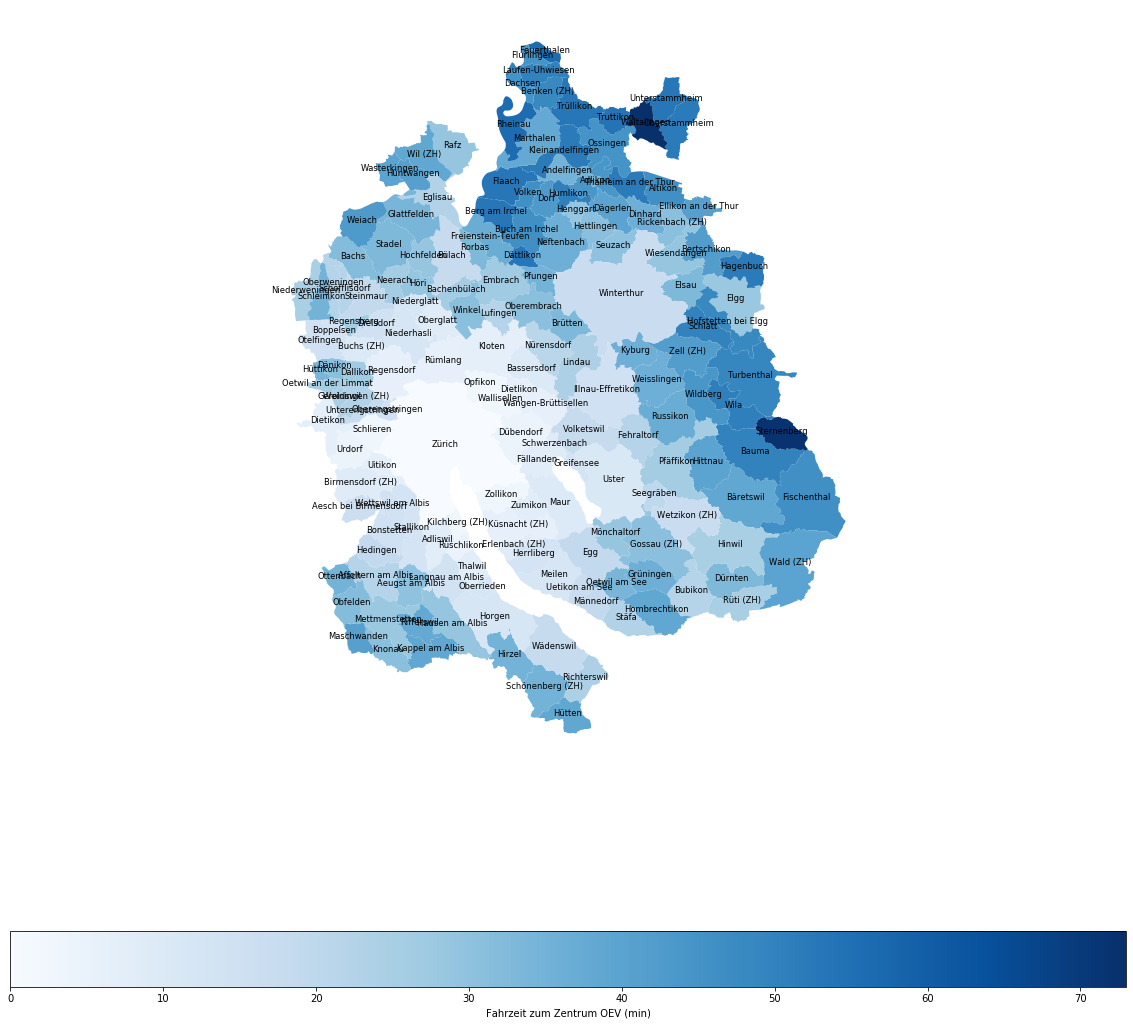

In [27]:
#Kantone rausfiltern zb. Kanton Zürich
gpdGr = gpdOev[gpdOev['KT_KZ'].str.match('ZH')]
ax = gpdGr.plot(column='REISEZEIT', 
                cmap = 'Blues',
               figsize=(20,20),
               legend=True, 
                 legend_kwds={'label': "Fahrzeit zum Zentrum OEV (min)", 'orientation': "horizontal"})

gpdGr.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', color = 'black', fontsize='small'),axis=1);

#Box deaktivieren
plt.box(False)

#Achsenbeschriftungen deaktivieren
plt.axis('off')
plt.savefig('../Grafiken/reisezeitZuDenZentrenMitOevKantonZuerich.pdf')